<h1 align = 'center'> Машиное Обучение  </h1>
<h2 align = 'center'>  Perceptron</h2>


<h4 align = 'center' > Хаммуд Обадах</h4>

A multilayer perceptron. One activation function is used (sigmoid). Datasets used: Iris and dataset generated with the data-generator  tool which is also included in this repo.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
class Perceptron:
    def __init__(self,x,y,hidden_layers=[8],normalize=False):
        self.epoches=100000
        self.hidden_layers=hidden_layers
        self.n = 0.1
        self.W = []
        randomness=100
        from sklearn.utils import shuffle
        self.x = shuffle(x, random_state = randomness)
        self.y = shuffle(y, random_state = randomness)
        self.inputs_number = len(self.x[0])
        self.classes_number = np.max(self.y)+1
        self.y = self.one_hot_encoding(self.y)
        '''
        hh=np.c_[self.x,self.y]
        po=[]
        for i in range(len(self.y)):
            if self.y[i] == [0,0,1]:
                po=np.r_[po,hh[i]]
        
        
        print(po)
        cc = hh[(hh[:,-3:] == [0,0,1])]
        
        print(cc)
        '''
        if normalize==True:
            self.x = self.normalize(self.x)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2)#Split data to training and validation data
        
        self.generate_layers_weights()
        self.errors = []
          
    
    def one_hot_encoding(self,Y):
        n_col = np.amax(Y) + 1
        binarized = np.zeros((len(Y), n_col))
        for i in range(len(Y)):
            binarized[i, Y[i]] = 1.
        return binarized

    
    def sigmoid(self,x, deriv = False):
        if(deriv==True):
            return self.sigmoid(x)*(1-self.sigmoid(x))
        return 1/(1+np.exp(-x))

    
    def normalize(self,X, axis=-1, order=2):
        l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
        l2[l2 == 0] = 1
        return X / np.expand_dims(l2, axis)

    def generate_weights(self,outputs,inputs):
        return 2*np.random.random((inputs, outputs)) - 1
    def generate_layers_weights(self):
        layers = len(self.hidden_layers)
        self.W.append(self.generate_weights(self.hidden_layers[0],self.inputs_number))
        for i in range(len(self.hidden_layers)-1):
            self.W.append(self.generate_weights(self.hidden_layers[i+1],self.hidden_layers[i]))
        self.W.append(self.generate_weights(self.classes_number,self.hidden_layers[len(self.hidden_layers)-1]))

    def train(self):
        A=[]
        __=0
        for i in range(self.epoches):
            #Feed forward
            A=[]
            A.append(self.X_train)
            for k in range(len(self.hidden_layers)+1):
                A.append(self.sigmoid(np.dot(A[-1], self.W[k])))
            
            layer_error = []#it contains errors from last layer to the first
            layer_delta = []
            layer_error.append(self.y_train - A[-1])
            layer_delta.append(layer_error[-1] * self.sigmoid(A[-1], deriv=True))
            
            for k in range(len(self.hidden_layers)):
                layer_error.append(layer_delta[-1].dot(self.W[-1-k].T))
                layer_delta.append(layer_error[-1] * self.sigmoid(A[-2-k], deriv=True))
            
            for k in range(len(self.W)):
                self.W[-1-k] +=A[-2-k].T.dot(layer_delta[k]) * self.n
            
            error = np.mean(np.abs(layer_error[0]))
            if i>0:
                if(error<0.008):
                    break
            self.errors.append(error)
            accuracy = (1 - error) * 100
            perfect=False
            if i%100==0:
                if self.check(self.y_train,A[-1])[0] == 0:
                    break
        
        plt.plot(self.errors)
        plt.xlabel('Training')
        plt.ylabel('Error')
        plt.show()
        print("Training Accuracy " + str(round(accuracy,2)) + "%")
        
        B=[]
        B.append(self.X_test)
        for i in range(len(self.hidden_layers)+1):
            B.append(self.sigmoid(np.dot(B[-1], self.W[i])))
        
        mistakes,indexes = self.check(self.y_test,B[-1])
        b_error = self.y_test - B[-1]
        error = np.mean(np.abs(b_error))
        accuracy = (1 - error) * 100
        print("Validation Accuracy " + str(round(accuracy,2)) + "%")
        
        self.plot_2d(self.X_test,indexes)
    def check(self,data,data_hat):
        indexes=[]
        mistakes=0
        yhat=np.zeros((len(data),self.classes_number))
        for k in range(len(data_hat)):
            max=data_hat[k,0]
            max_j=0
            for j in range(len(data_hat[0])):
                if max<data_hat[k,j]:
                    max=data_hat[k,j]
                    max_j=j
            _ = np.zeros(self.classes_number)
            _[max_j]=1
            yhat[k][max_j]=1
        for k in range(len(yhat)):
            if(np.array_equal(yhat[k],data[k])==False):
                indexes=np.r_[indexes,k]
                mistakes=mistakes+1
            
        return mistakes,indexes
                
        
        
    def plot_2d(self,x,indexes):
        if(self.inputs_number==2):
            corrects=np.zeros((len(x)-len(indexes) , 2))
            incorrects=np.zeros((len(indexes) , 2))
            counter=0
            for i in range(len(x)-len(indexes)):
                if i in indexes:
                    incorrects[i-counter][0]=x[i][0]
                    incorrects[i-counter][1]=x[i][1]
                else:
                    corrects[counter][0]=x[i][0]
                    corrects[counter][1]=x[i][1]
                    counter=counter+1
            plt.scatter(corrects[:,0],corrects[:,1])
            plt.scatter(incorrects[:,0],incorrects[:,1])
            
            

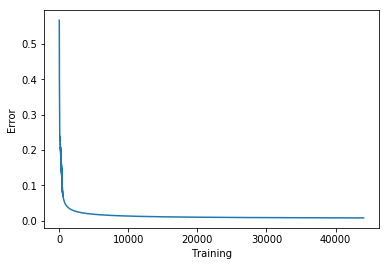

Training Accuracy 99.01%
Validation Accuracy 100.00%


In [0]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

perceptron = Perceptron(x,y,normalize=True)
perceptron.train()

Populating the interactive namespace from numpy and matplotlib


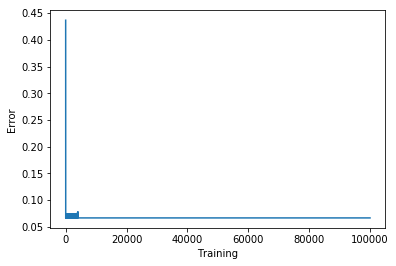

Training Accuracy 99.21%
Validation Accuracy 100.00%


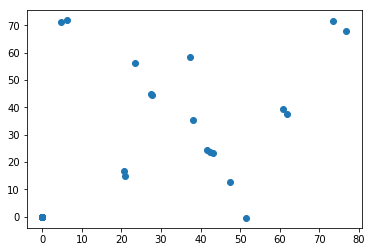

In [0]:
%pylab inline
from sklearn import datasets
data = genfromtxt('far.csv', delimiter=',')

x = data [:,0:-1]
y = data[:,-1].astype(int)
p = Perceptron(x,y)
p.train()

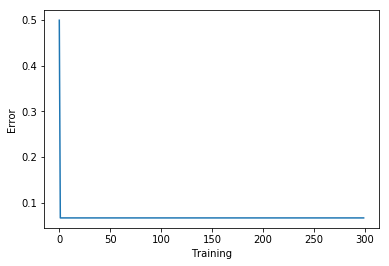

Training Accuracy 90.15%
Validation Accuracy 91.32%


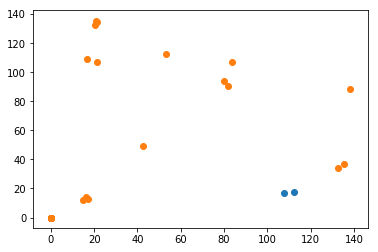

In [0]:
data = genfromtxt('five.csv', delimiter=',')

x = data [:,0:-1]
y = data[:,-1].astype(int)
p = Perceptron(x,y,hidden_layers=[3])
p.train()